In [22]:
library(repr)
library(tidyverse)
library(dplyr)
library(tidyverse)
library(tidymodels)
library(cowplot)

In [32]:
players_age <-read_csv("data/players.csv") |>
select(played_hours, age)

players_age_split <- initial_split(players_age, prop=0.7, strata=played_hours)
players_age_training <- training(players_age_split)
players_age_testing <-testing(players_age_split)

age_model <-nearest_neighbor(weight_func="rectangular", neighbor=tune()) |>
set_engine("kknn") |>
set_mode("regression")

age_recipe <-recipe (played_hours~age, data=players_age) |>
step_scale(all_predictors()) |>
step_center(all_predictors())

age_vfold <- vfold_cv(players_age_training, v=4)
gridvals1 <-tibble(neighbors=seq(from=1, to=15, by=1))

neighbors1<-workflow() |>
            add_recipe(age_recipe) |>
            add_model(age_model) |>
            tune_grid(resamples=age_vfold,grid=gridvals1)
neighbors1_results<-collect_metrics(neighbors1)
neighbors1_results

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,24.128287127,4,8.5959596936,Preprocessor1_Model01
1,rsq,standard,0.003558590,4,0.0013828664,Preprocessor1_Model01
2,rmse,standard,23.334380811,4,9.0306999432,Preprocessor1_Model02
2,rsq,standard,0.003090261,4,0.0008980173,Preprocessor1_Model02
3,rmse,standard,23.193256664,4,9.0688772759,Preprocessor1_Model03
3,rsq,standard,0.002558373,4,0.0010491318,Preprocessor1_Model03
4,rmse,standard,23.509382483,4,8.8967373361,Preprocessor1_Model04
4,rsq,standard,0.004455333,4,0.0010574023,Preprocessor1_Model04
5,rmse,standard,24.938892258,4,8.2968295978,Preprocessor1_Model05


In [36]:
best_k1 <- filter(neighbors1_results, .metric =="rmse") |>
slice_min(mean, n=1)
best_k1

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
3,rmse,standard,23.19326,4,9.068877,Preprocessor1_Model03


In [37]:
best_k_model1<-nearest_neighbor(weight_func="rectangular", neighbor=3) |>
set_engine ("kknn") |>
set_mode("regression")

age_fit<-workflow() |>
            add_recipe(age_recipe) |>
            add_model(best_k_model1) |>
            fit(players_age_training)

age_testing <- age_fit|>
           predict(players_age_testing) |>
           bind_cols(players_age_testing) |>
           metrics(truth = played_hours, estimate = .pred)
age_testing

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,30.853359863
rsq,standard,0.002100499
mae,standard,7.224444444


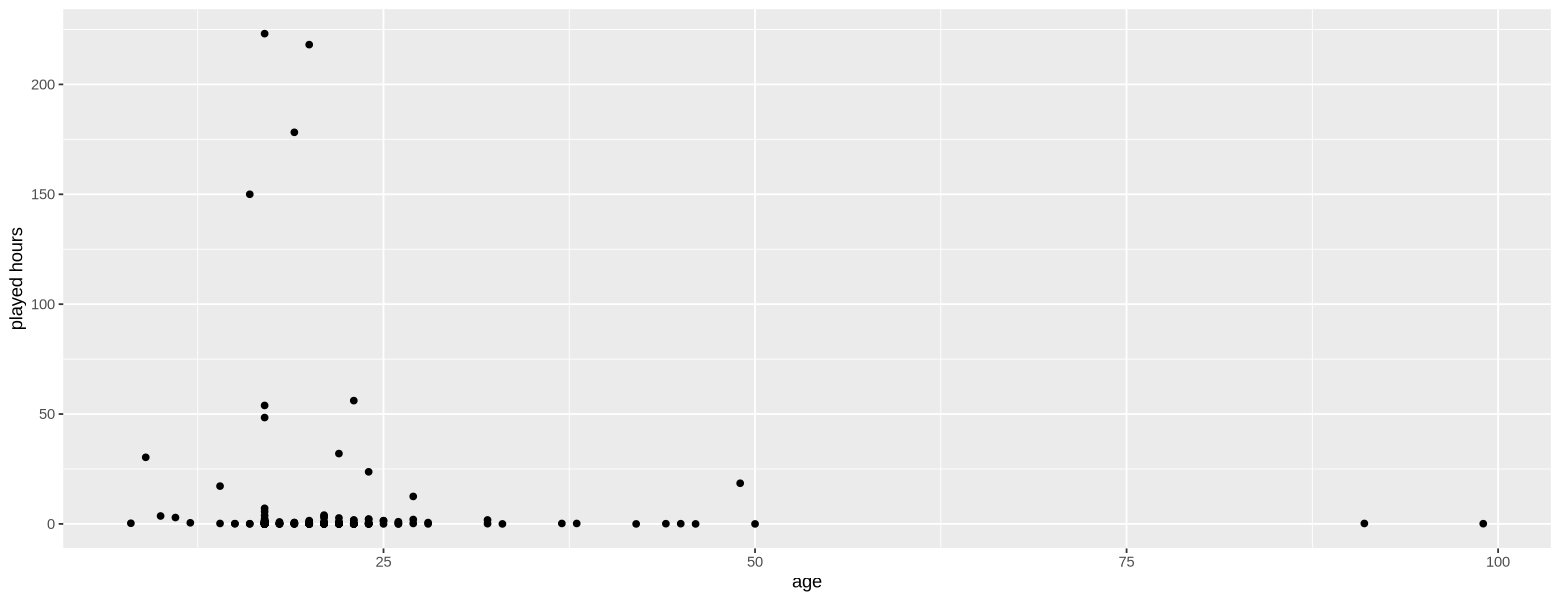

In [44]:
options(repr.plot.width=13, repr.plot.height=5)
age_plot <-ggplot(players_age, aes(x=age, y=played_hours)) +
                  geom_point()+
                  labs(x="age", y="played hours")
age_plot

In [6]:
players <-read_csv("data/players.csv") |>
select(experience, subscribe, played_hours, gender, age)
players

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,played_hours,gender,age
<chr>,<lgl>,<dbl>,<chr>,<dbl>
Pro,TRUE,30.3,Male,9
Veteran,TRUE,3.8,Male,17
Veteran,FALSE,0.0,Male,17
Amateur,TRUE,0.7,Female,21
Regular,TRUE,0.1,Male,21
Amateur,TRUE,0.0,Female,17
Regular,TRUE,0.0,Female,19
Amateur,FALSE,0.0,Male,21
Amateur,TRUE,0.1,Male,17


In [18]:
#data wrangling
# The age groups are divided into smaller groups for young ages as game server is likely having more young participants.
# played hour group has a <=1 group as great amount of players probably just signed up but not yet played with played hour 0.0
age_group <-function(age)
    {if (age >65) 
    {return ("seniors")}
     else if (age >34)
    {return ("working pop")}
     else if (age >25)
    {return ("young working pop")}
     else if (age > 18)
    {return ("uni age")}
     else
         {return ("teenager")}}


played_hour_group <-function(played_hours)
    {if (played_hours >30) 
    {return ("long")}
     else if (played_hours>10)
    {return ("medium")}
     else if (played_hours>1)
    {return ("short")}
     else
    {return ("very short")}}


players_newcol <- players |>
mutate(age_group = sapply(age, age_group)) |>
mutate(played_hour_group = sapply(played_hours, played_hour_group))
players_newcol

experience,subscribe,played_hours,gender,age,age_group,played_hour_group
<chr>,<lgl>,<dbl>,<chr>,<dbl>,<chr>,<chr>
Pro,TRUE,30.3,Male,9,teenager,long
Veteran,TRUE,3.8,Male,17,teenager,short
Veteran,FALSE,0.0,Male,17,teenager,very short
Amateur,TRUE,0.7,Female,21,uni age,very short
Regular,TRUE,0.1,Male,21,uni age,very short
Amateur,TRUE,0.0,Female,17,teenager,very short
Regular,TRUE,0.0,Female,19,uni age,very short
Amateur,FALSE,0.0,Male,21,uni age,very short
Amateur,TRUE,0.1,Male,17,teenager,very short


In [21]:
set.seed(999)
players_split <- initial_split(players_newcol, prop=0.7, strata = played_hour_group)
players_training <-training(players_split)
players_testing <-testing(players_split)

In [34]:
set.seed(999)
players_model<- nearest_neighbor(weight_func="rectangular", neighbor=tune()) |>
set_engine ("kknn") |>
set_mode("regression")

players_recipe <-recipe(played_hours ~experience, subscribe, gender, age_group, data = players_training)
players_recipe



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 1



In [25]:
set.seed(999)
#the neighbors2 generate a long warning message that I am not sure whether it affects final outcome.
# small folds for small data
players_vfold <- vfold_cv(players_training, v=2)
gridvals2 <-tibble(neighbors=seq(from=1, to=10, by=1))

neighbors2<-workflow() |>
            add_recipe(players_recipe) |>
            add_model(players_model) |>
            tune_grid(resamples=players_vfold,grid=gridvals2)
neighbors2_results<-collect_metrics(neighbors2)
neighbors2_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,28.530121936,2,4.2098024236,Preprocessor1_Model01
1,rsq,standard,0.002538137,2,0.0012748359,Preprocessor1_Model01
2,rmse,standard,28.529883157,2,4.2043957368,Preprocessor1_Model02
2,rsq,standard,0.003842667,2,0.0005206899,Preprocessor1_Model02
3,rmse,standard,28.527773609,2,4.2036483031,Preprocessor1_Model03
3,rsq,standard,0.004833549,2,0.0006767920,Preprocessor1_Model03
4,rmse,standard,28.529903821,2,4.2040019123,Preprocessor1_Model04
4,rsq,standard,0.007293690,2,0.0008986551,Preprocessor1_Model04
5,rmse,standard,28.557585152,2,4.1752264132,Preprocessor1_Model05


In [33]:
#find min rmse
# dont know why the mean simply declines all the way for v=3 to 5, maybe too small data so overfitting.
#k = 20 has lowest mean when testing range, however the data set is small using k=20 seems irrational.
best_k2<-neighbors2_results |>
filter(.metric == "rmse") |>
slice_min(mean, n=1) 
best_k2

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
9,rmse,standard,28.48703,2,4.148336,Preprocessor1_Model09


In [34]:
best_k_model<-nearest_neighbor(weight_func="rectangular", neighbor=9) |>
set_engine ("kknn") |>
set_mode("regression")

players_fit<-workflow() |>
            add_recipe(players_recipe) |>
            add_model(best_k_model) |>
            fit(players_training)

check_testing <- players_fit|>
           predict(players_testing) |>
           bind_cols(players_testing) |>
           metrics(truth = played_hours, estimate = .pred)
check_testing

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,28.959041389
rsq,standard,0.001104078
mae,standard,4.697037037


This model actually has very high rmse predicting played_hours compare to its range.

In [ ]:
#work on played_hour vs age
